# Uber data analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime,time
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('My Uber Drives - 2016.csv ')

In [4]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [6]:
df.columns=df.columns.str.replace('*','')

In [7]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE    1156 non-null object
END_DATE      1155 non-null object
CATEGORY      1155 non-null object
START         1155 non-null object
STOP          1155 non-null object
MILES         1156 non-null float64
PURPOSE       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
df.shape

(1156, 7)

In [10]:
df.describe() #statical data give for only integers or float

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [11]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

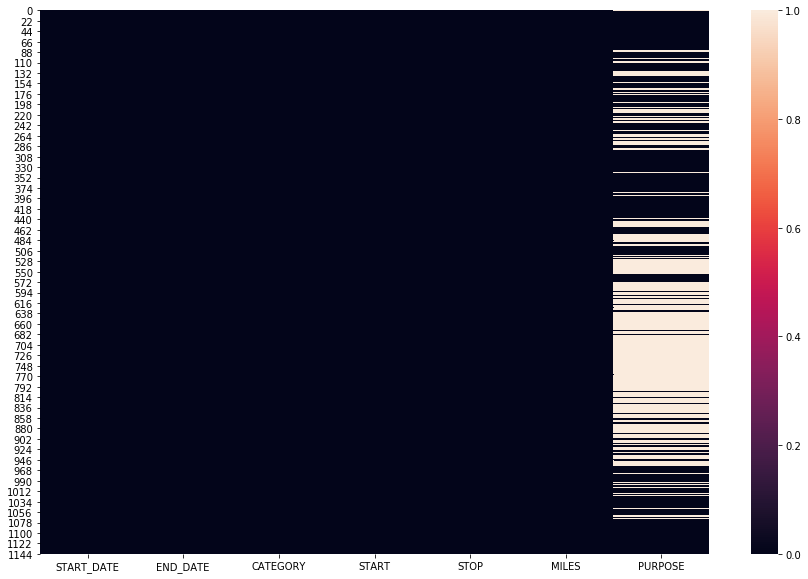

In [12]:
plt.figure(figsize=(15,10)) # visualising the null value in all the columns i.e maximum in purpose
sns.heatmap(df.isnull())

In [13]:
df.dropna(axis=0,subset=['END_DATE','CATEGORY','START','STOP'],how='all',inplace=True)# clean the single null value from 4 columns
df.shape

(1155, 7)

In [14]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [15]:
df['PURPOSE'].fillna(method='ffill',inplace=True)## filling the null values with forward values in purpose col

In [16]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [17]:
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')  ##converting the object data in datetime
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE    1155 non-null datetime64[ns]
END_DATE      1155 non-null datetime64[ns]
CATEGORY      1155 non-null object
START         1155 non-null object
STOP          1155 non-null object
MILES         1155 non-null float64
PURPOSE       1155 non-null object
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


## Data Analysis

In [19]:
category=pd.crosstab(index=df['CATEGORY'],columns='count of records')
category

col_0,count of records
CATEGORY,
Business,1078
Personal,77


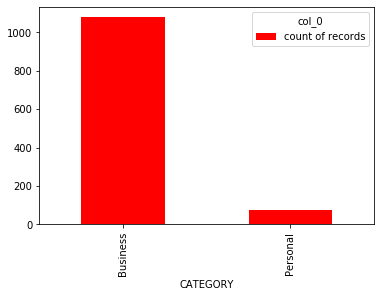

In [20]:
category.plot(kind='bar',color='r')

In [21]:
start_point =df['START'].value_counts() ##most common locations are
start_point.head(10)# top 10 start locations

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Name: START, dtype: int64

In [22]:
start_point[start_point>10] ##locations that are booked more than 10 times

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Westpark Place       17
Berkeley             16
Midtown              14
Kissimmee            11
Kenner               11
R?walpindi           11
Name: START, dtype: int64

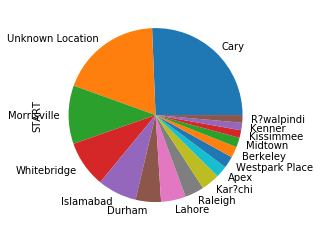

In [23]:
start_point[start_point>10].plot(kind='pie')

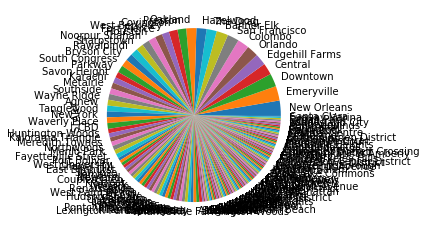

In [24]:
start_point[start_point<=10].plot(kind='pie')

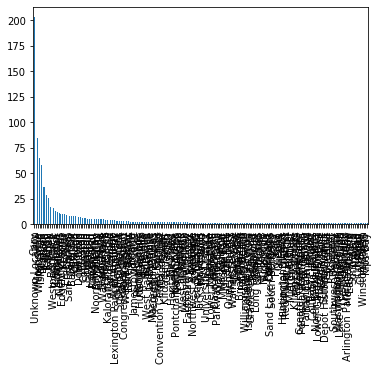

In [35]:
stop_point=df.STOP.value_counts() # stop points
stop_point

In [26]:
stop_point[stop_point>10] # more than 10 times

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64

In [37]:
miles=df.MILES.value_counts()
miles

9.9      28
3.1      26
2.1      19
10.4     19
2.5      19
         ..
310.3     1
11.1      1
10.7      1
195.6     1
22.7      1
Name: MILES, Length: 256, dtype: int64

In [28]:
miles[miles>10] ## no of miles travelled more number of times 28 times 9.9 miles travelled

9.9     28
3.1     26
2.1     19
10.4    19
2.5     19
3.0     19
1.8     18
2.2     18
1.7     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
1.4     14
5.5     14
1.6     13
7.9     13
1.5     12
2.7     12
6.2     12
5.7     12
2.9     12
2.3     12
6.0     11
7.7     11
1.0     11
4.9     11
5.1     11
Name: MILES, dtype: int64

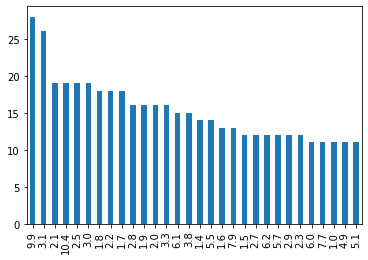

In [29]:
miles[miles>10].plot(kind='bar')

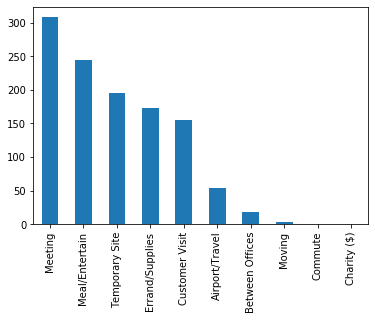

In [30]:
df.PURPOSE.value_counts().plot(kind='bar')

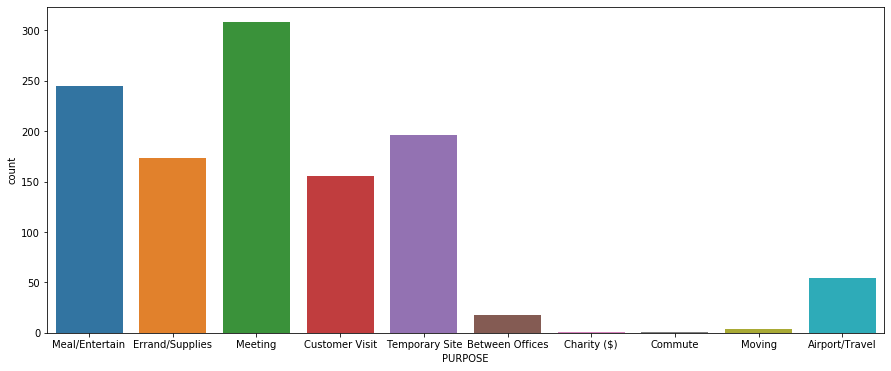

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'])

##### Getting a minute column that will represent total time in travel by subtracting start_date from end_date

In [33]:
df['minutes']=df.END_DATE-df.START_DATE 

In [34]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01:07:00


##### Converting whole in seconds then getting minutes by dividing by 60.

In [38]:
df['minutes']=df['minutes'].dt.total_seconds()/60 

In [39]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

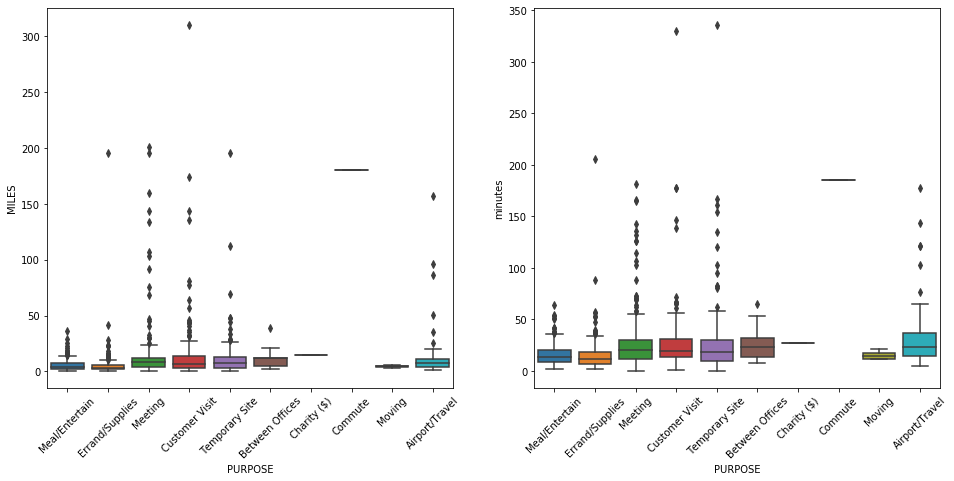

In [45]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes)
plt.xticks(rotation=45)

##### for each purpose what is min miles travelled , mean miles travelled and what is max miles travelled

In [48]:
pd.DataFrame({'Mean': df.groupby(['PURPOSE'])['MILES'].mean(),'Min':df.groupby(['PURPOSE'])['MILES'].min(),'MAX':df.groupby(['PURPOSE'])['MILES'].max()})
    

,Mean,Min,MAX
PURPOSE,,,
Airport/Travel,14.953704,0.9,156.9
Between Offices,10.944444,1.9,39.2
Charity ($),15.100000,15.1,15.1
Commute,180.200000,180.2,180.2
Customer Visit,16.065806,0.6,310.3
Errand/Supplies,5.928902,0.5,195.3
Meal/Entertain,5.773878,0.6,36.5
Meeting,12.652597,0.7,201.0
Moving,4.550000,3.3,6.1


In [49]:
pd.DataFrame({'Mean': df.groupby(['PURPOSE'])['minutes'].mean(),'Min':df.groupby(['PURPOSE'])['minutes'].min(),'MAX':df.groupby(['PURPOSE'])['minutes'].max()})


,Mean,Min,MAX
PURPOSE,,,
Airport/Travel,34.925926,5.0,178.0
Between Offices,25.500000,8.0,65.0
Charity ($),27.000000,27.0,27.0
Commute,185.000000,185.0,185.0
Customer Visit,28.387097,1.0,330.0
Errand/Supplies,15.710983,2.0,206.0
Meal/Entertain,15.926531,2.0,64.0
Meeting,25.954545,0.0,181.0
Moving,15.000000,11.0,21.0


In [50]:
df.groupby('PURPOSE')['MILES'].describe() #or either use this

,count,mean,std,min,25%,50%,75%,max
PURPOSE,,,,,,,,
Airport/Travel,54.0,14.953704,26.588696,0.9,4.325,7.45,10.875,156.9
Between Offices,18.0,10.944444,8.458913,1.9,5.200,11.60,12.350,39.2
Charity ($),1.0,15.100000,NaN,15.1,15.100,15.10,15.100,15.1
Commute,1.0,180.200000,NaN,180.2,180.200,180.20,180.200,180.2
Customer Visit,155.0,16.065806,33.665367,0.6,3.150,6.90,13.950,310.3
Errand/Supplies,173.0,5.928902,15.429904,0.5,1.900,3.20,5.300,195.3
Meal/Entertain,245.0,5.773878,4.931104,0.6,2.500,4.20,7.200,36.5
Meeting,308.0,12.652597,23.597450,0.7,3.800,8.80,11.600,201.0
Moving,4.0,4.550000,1.181807,3.3,3.900,4.40,5.050,6.1


In [53]:
##### finding round trip
def round(x):
    if x['START']==x['STOP']:
            return 'yes'
    else:
            return 'no'

# for i in df['START'] and j in  df['END']:
#     if i===j:
#         df

In [55]:
df['round_trip']=df.apply(round,axis=1)

In [56]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,round_trip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no


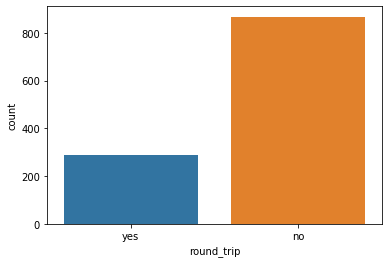

In [57]:
sns.countplot(df['round_trip'])

##### extracting the month  from date

In [58]:
df['month']=pd.DatetimeIndex(df['START_DATE']).month

In [59]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,round_trip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,1


In [60]:
dic ={1:'jan',2:'feb',3:'march',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

In [61]:
df['month']= df['month'].map(dic)

In [62]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,round_trip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,jan


In [65]:
df['month'].value_counts()

dec      146
aug      133
nov      122
feb      115
march    113
jul      112
jun      108
oct      106
jan       61
apr       54
may       49
sep       36
Name: month, dtype: int64

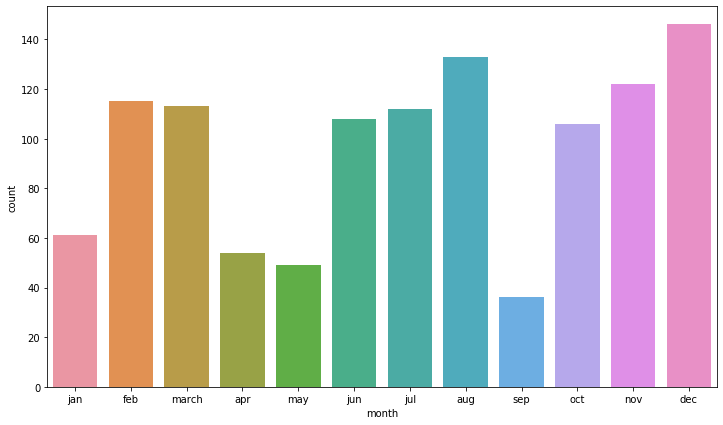

In [66]:
plt.figure(figsize=(12,7))
sns.countplot(df['month'])

In [67]:
pd.set_option('display.max_rows',None) # making to display all the rows

#####  Getting the  total number of trips in a particular month for a particular purpose

In [76]:
df.groupby(['month','PURPOSE'])['round_trip'].count()

month  PURPOSE        
apr    Between Offices     3
       Customer Visit      9
       Errand/Supplies     7
       Meal/Entertain     12
       Meeting            20
       Temporary Site      3
aug    Airport/Travel     52
       Customer Visit     19
       Meal/Entertain     11
       Meeting            17
       Temporary Site     34
dec    Airport/Travel      2
       Between Offices     1
       Customer Visit     26
       Errand/Supplies    47
       Meal/Entertain     31
       Meeting            30
       Temporary Site      9
feb    Between Offices     1
       Customer Visit     14
       Errand/Supplies    15
       Meal/Entertain     25
       Meeting            35
       Temporary Site     25
jan    Customer Visit     11
       Errand/Supplies    13
       Meal/Entertain     16
       Meeting            18
       Temporary Site      3
jul    Charity ($)         1
       Commute             1
       Customer Visit      2
       Errand/Supplies    33
       Meal/Entertai

In [77]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,round_trip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,jan
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0,yes,jan
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,5.0,no,jan
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,6.0,yes,jan
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,20.0,no,jan
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,27.0,no,jan


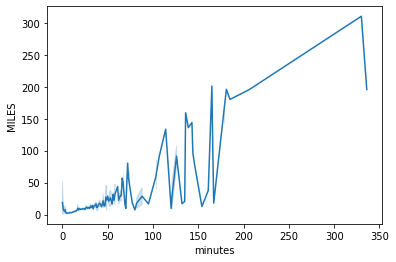

In [78]:
sns.lineplot(data=df,x=df.minutes,y=df.MILES)  #miles decrease more time so traffic is there

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

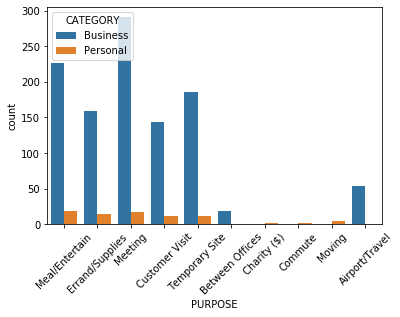

In [80]:
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY') #number of bussiness and personal trip corresspondinng each purpose
plt.xticks(rotation=45)

In [81]:
df.describe()

,MILES,minutes
count,1155.000000,1155.000000
mean,10.566840,23.243290
std,21.579106,27.318277
min,0.500000,0.000000
25%,2.900000,10.000000
50%,6.000000,16.000000
75%,10.400000,27.500000
max,310.300000,336.000000


### Conclusion
